# Fourier Transform Model of Image Formation

The Fourier transform (FT) transform is one among the many classes of linear transforms that recast information into a set of linear basis functions. In particular, FT converts a signal with  physical dimension $x$ into a signal with dimension $\frac{1}{x}$ using sinusoids as basis functions. If the signal has dimensions of space, the FT of the signal will have dimensions of inverse space or spatial frequency.

The 2D FFT has the following properties:
1. The output of FFT2 has quadrants along the diagonals interchanged. That is if the quadrants are labeled in the clockwise direction as $\begin{bmatrix} 4&1\\3&2 \end{bmatrix}$, the FFT output comes out as $\begin{bmatrix} 2&4\\1&3 \end{bmatrix}$. The function `fftshift()` interchanges the quadrants back.
2. The output of the FFT2 is a complex number array. To view the intensity, use `abs()` function which computes the modulus of the a complex number.
3. The inverse FFT2 , `ifft2()`, is just the same as the forward fft2( ) only that the output image may be upside down.

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
from scipy import stats

plt.rcParams["figure.figsize"] = (4,4)
# plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 300

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def aperture_fft(aperture_shape):
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(aperture_shape, cmap = "gray")
    ax[0].set_title("Aperture")
    ax[0].axis("off")
    
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    ax[1].imshow(fftshift_aperture, cmap = "hot")
    ax[1].set_title("FFT")
    ax[1].axis("off")
    
    ax[2].imshow(np.log(fftshift_aperture), cmap = "hot")
    ax[2].set_title("FFT in log scale")
    ax[2].axis("off")


## Activity 2.1 - Familiarization with Discrete FT

### Circular aperture

In [3]:
def circular_aperture(radius, resolution):
    N = resolution
    x = np.linspace(-1, 1, N)
    y = x
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    
    aperture = np.zeros(np.shape(R))
    aperture = np.where((R<radius), 1, 0)
    
    return aperture

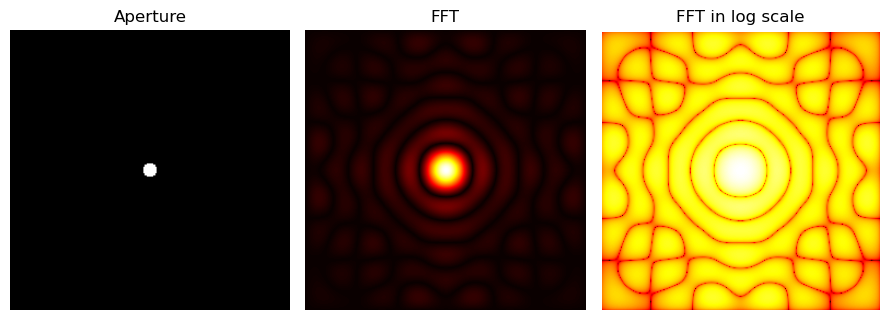

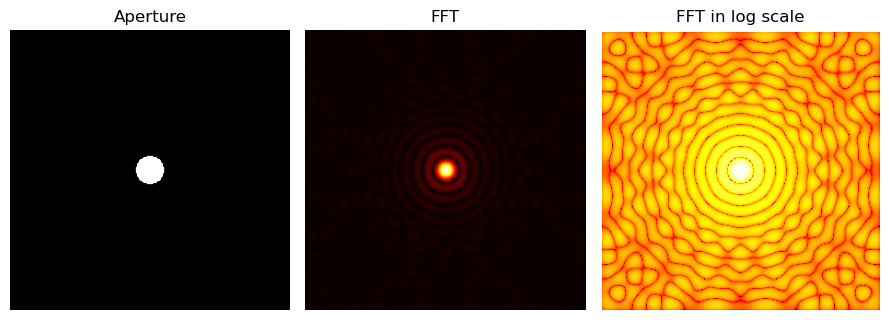

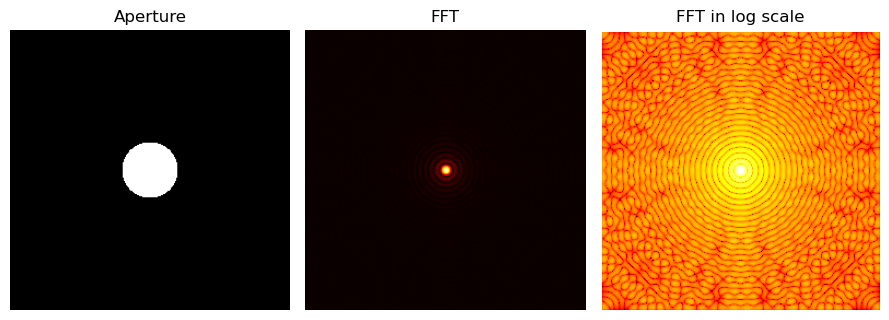

In [4]:
radius = [0.05, 0.1, 0.2]

for rad in radius:
    aperture_fft(circular_aperture(rad, 256))
    plt.savefig("radius {}.png".format(rad))

### Rectangular aperture

In [5]:
def rectangular_aperture(width, height, resolution):
    aperture = np.zeros((resolution, resolution), float)
    center = [resolution/2, resolution/2]
    width_array = np.arange(center[0] - width//2, center[0] + width//2)
    height_array = np.arange(center[1] - height//2, center[1] + height//2)
    for w in width_array:
        for h in height_array:
            aperture[int(h)][int(w)] = 1.0
            
    return aperture

#### Varying heights

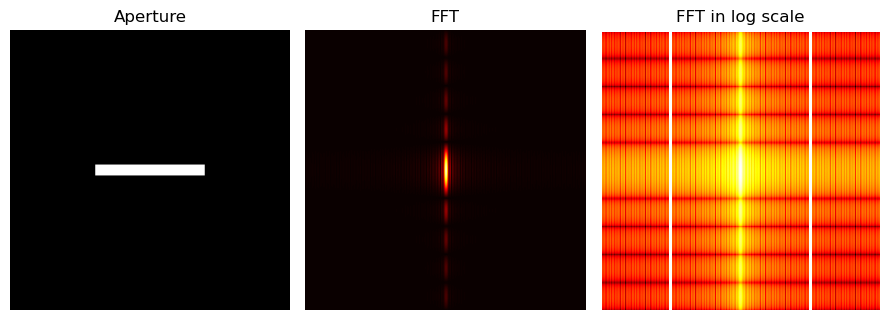

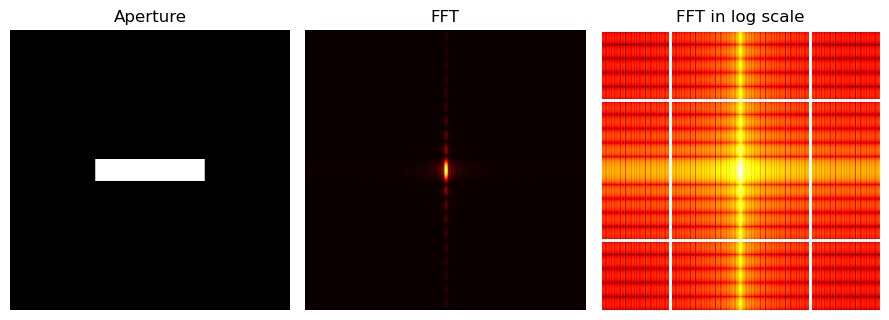

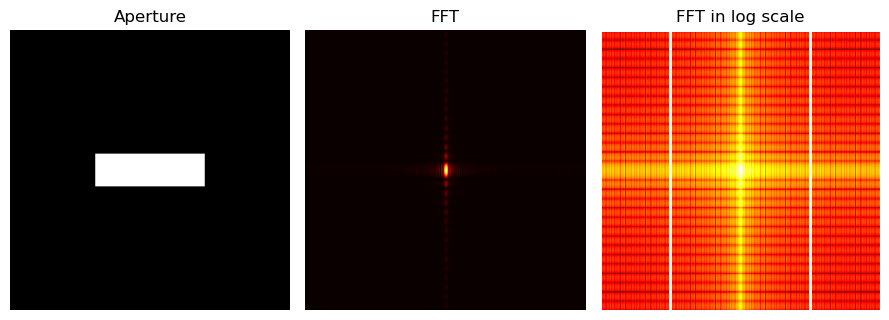

In [6]:
height = [10, 20, 30]

for h in height:
    aperture_fft(rectangular_aperture(100, h, 256))
    plt.savefig("height {}.png".format(h))

#### Varying widths

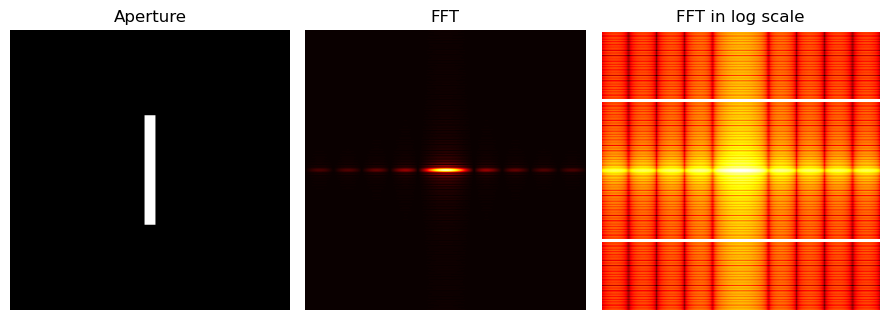

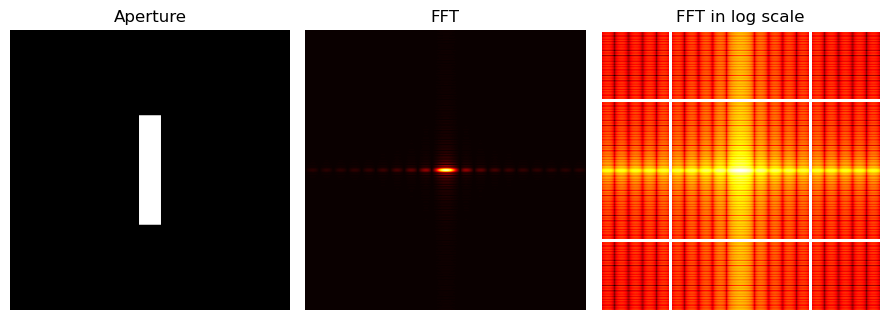

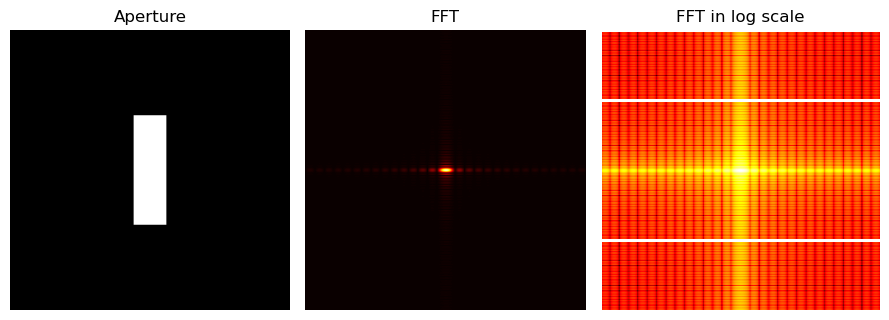

In [7]:
width = [10, 20, 30]

for w in width:
    aperture_fft(rectangular_aperture(w, 100, 256))
    plt.savefig("width {}.png".format(w))

### Square aperture

Special case of rectangular aperture where the height and width are equal.

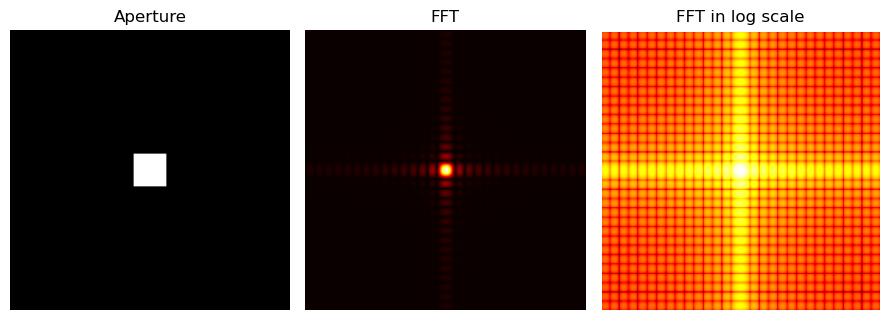

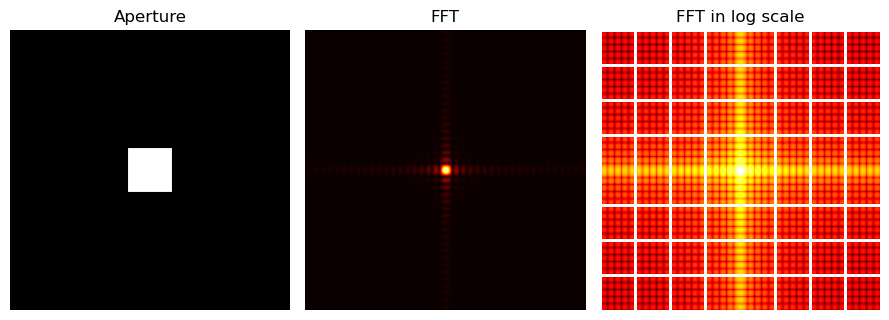

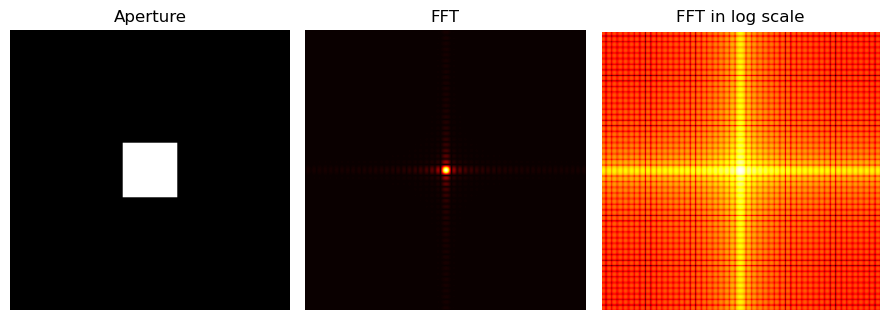

In [8]:
side = [30, 40, 50]

for s in side:
    aperture_fft(rectangular_aperture(s, s, 256))
    plt.savefig("square {}.png".format(s))

### Double slit aperture

In [9]:
def double_slit(width, height, distance, resolution):
    aperture = np.zeros((resolution, resolution), float)
    center = [resolution/2, resolution/2]
    slit_center = [center[0] - distance/2, center[0] + distance/2]
    slitwidth_array1 = np.arange(slit_center[0] - width, slit_center[0])
    slitwidth_array2 = np.arange(slit_center[1], slit_center[1] + width)
    slitheight_array = np.arange(center[0] - height//2, center[0] + height//2)
    
    for w1 in slitwidth_array1:
        for w2 in slitwidth_array2:
            for h in slitheight_array:
                aperture[int(h)][int(w1)] = 1.0
                aperture[int(h)][int(w2)] = 1.0
            
    return aperture

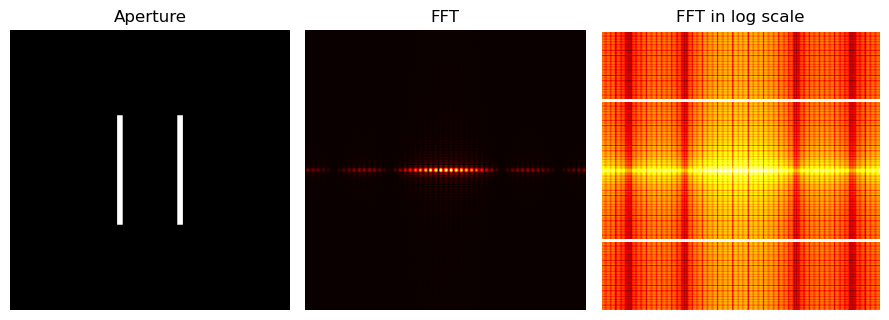

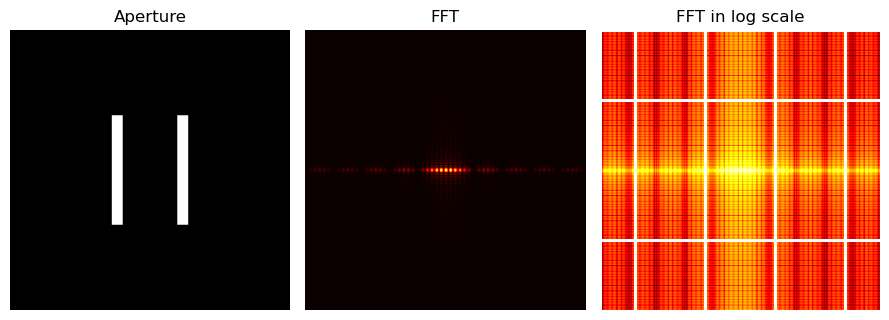

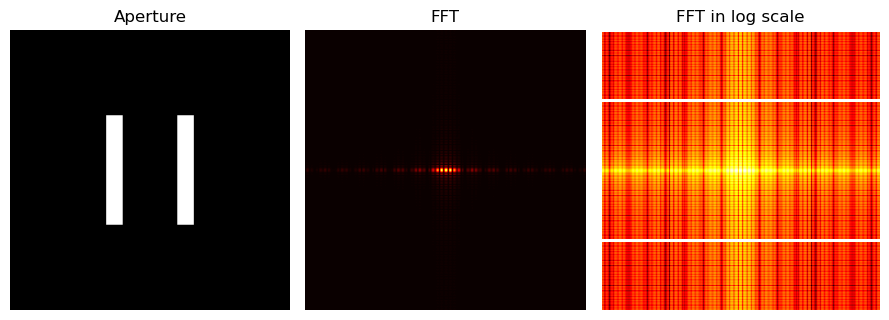

In [10]:
slitwidth = [5, 10, 15]

for w in slitwidth:
    aperture_fft(double_slit(w, 100, 50, 256))
    plt.savefig("slit width {}.png".format(w))

### Grating aperture
We use a similarcode implemented in the previous activity simulation on diffraction gratings.

In [11]:
def sinusoid(freq, angle, resolution):
    x = np.linspace(0, np.pi, resolution)
    X, Y = np.meshgrid(x, x)
    grating = np.sin(2*freq*(X*np.cos(angle) + Y*np.sin(angle)))
    return grating

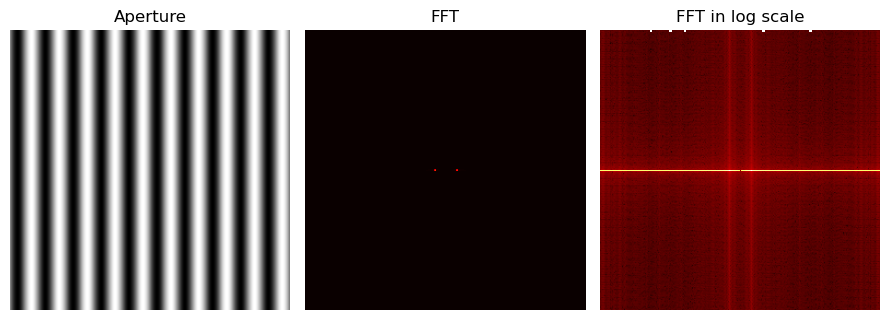

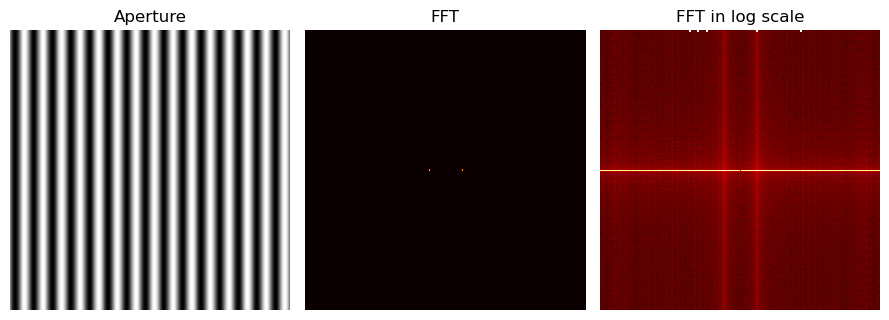

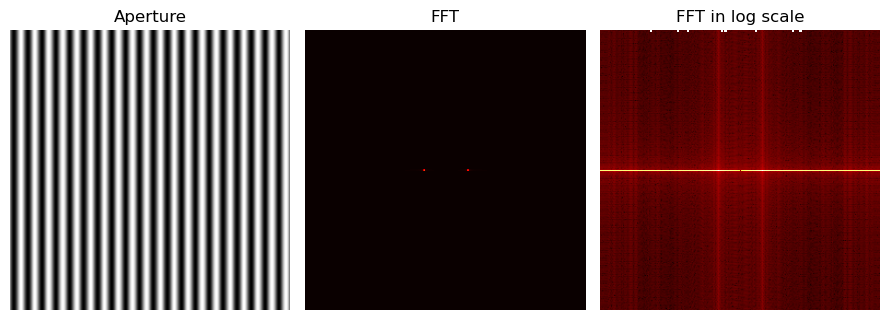

In [56]:
freqs = [10, 15, 20]

for freq in freqs:
    aperture_fft(sinusoid(freq, np.pi, 256))
    plt.savefig("sine freq {}.png".format(freq))

### Gaussian aperture

In [13]:
def gaussian(stdev, resolution):
    x = np.linspace(-1, 1, resolution)
    X, Y = np.meshgrid(x, x)
    r = np.sqrt(X**2 + Y**2)
    gaussian = stats.norm.pdf(r, scale = stdev)
    return gaussian

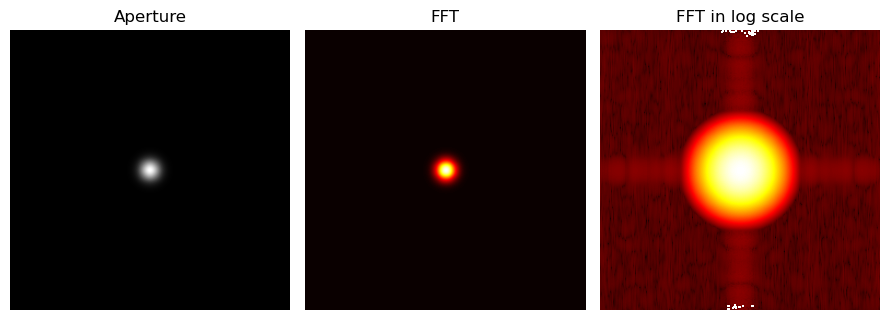

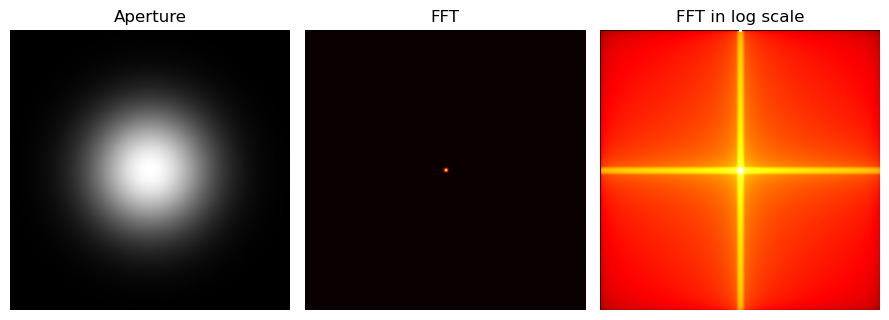

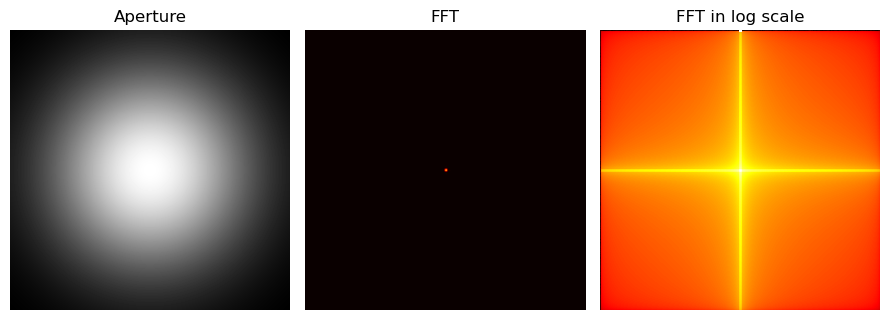

In [14]:
sigma = [0.05, 0.3, 0.5]

for stdev in sigma:
    aperture_fft(gaussian(stdev, 256))
    plt.savefig("gaussian {}.png".format(stdev))

### Basic FT and IFFT on Images
Observe how Fourier transform inverts and returns the image back to its original form.

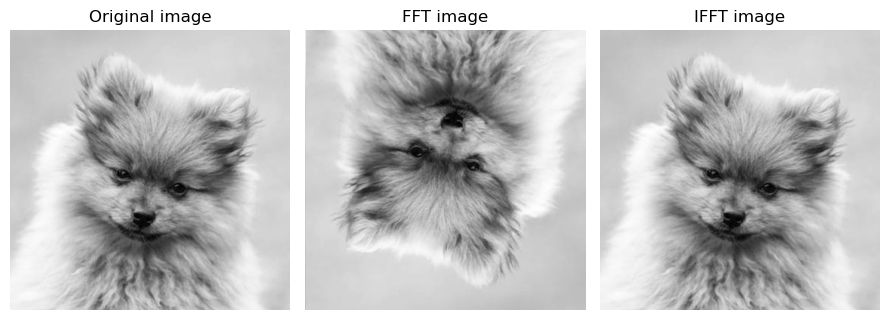

In [15]:
croppedimg = Image.open("cropped dog.png")
grayimg = np.array(croppedimg.convert("L"))

fft2_dog = fft.fft2(fft.fft2(grayimg))
ifft2_dog = fft.ifft2(fft.fft2(grayimg))

fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
ax[0].imshow(grayimg, cmap = "gray")
ax[0].set_title("Original image")
ax[1].imshow(abs(fft2_dog), cmap = "gray")
ax[1].set_title("FFT image")
ax[2].imshow(abs(ifft2_dog), cmap = "gray")
ax[2].set_title("IFFT image")

for i in range(3):
    ax[i].axis("off")
    
fig.savefig("doggo fft.png")

***
## Activity 2.2 - Simulation of an imaging system

### Convolution
The convolution between two 2-D functions $f$ and $g$ is given by $$ h(x,y) = f*g = \iint f(x',y') g(x-x',y-y') d{x'} d{y'} $$

The convolution is a linear operator which means that if $f$ and $g$ are recast by linear transformations such as the Laplace or Fourier transform, they obey the convolution theorem, $$H=FG$$.

where $H$, $F$ and $G$ are the transforms of $h$, $f$ and $g$ respectively. This means, a convolution in 2-D space is a multiplication in Fourier space. The convolution is a *smearing* of one function against another, such that the resulting function $h$ looks a little like both $f$ and $g$. Convolution is used to model the **linear regime of instruments or detection devices** such as in imaging. For example, $f$ can be the object, and $g$ can be the impulse response of the imaging system. Their convolution, $h$, is then the image produced by the detection system which as you will see is not perfectly identical to the original object.

The code for plotting such text image was patterned from this [site](https://www.geeksforgeeks.org/python-pil-imagedraw-draw-text/).

In [16]:
def textimg_generate(x, y, fontsize, bgcolor = "black", textcolor = "white", resolution = 256, text = None):
    background = Image.new("L", (resolution, resolution), color = bgcolor)
    font = ImageFont.truetype("C:/Windows/Fonts/Arial/ariblk.ttf", fontsize)
    textimg = ImageDraw.Draw(background)
    textimg.text((x, y), text, font = font, fill = textcolor)
    return background

In [17]:
def convolve(textimg, aperture): # image1 is the text and image2 is the lens
    fftshift_lens = fft.fftshift(aperture)
    fft2_text = fft.fft2(textimg)
    convolved_image = fftshift_lens*fft2_text
    ifft2_image = fft.ifft2(convolved_image)
    
    fig, ax = plt.subplots(1, 4, figsize = (11, 6), sharey = True, tight_layout = True)
    ax[0].imshow(textimg, cmap = "gray")
    ax[0].set_title("Image")
    ax[0].axis("off")
    
    ax[1].imshow(aperture, cmap = "gray")
    ax[1].set_title("Aperture")
    ax[1].axis("off")
    
    ax[2].imshow(abs(ifft2_image), cmap = "hot")
    ax[2].set_title("Convolved image")
    ax[2].axis("off")
    
    ax[3].imshow(np.log(abs(ifft2_image)), cmap = "hot")
    ax[3].set_title("Convolved image in log scale")
    ax[3].axis("off")

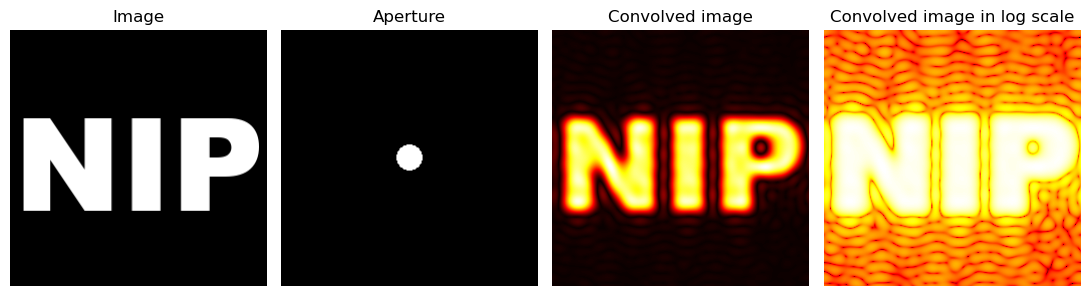

In [18]:
NIPtext = textimg_generate(4, 40, 128, text = "NIP")
lens_aperture = circular_aperture(0.1, 256)

convolve(NIPtext, lens_aperture)   
plt.savefig("nip convolved orig result.png")

#### Varying aperture radii

For imaging systems that use a lens with a circular aperture the transfer function is due to the finite size of the camera lens and aperture. A smaller lens radius or aperture means the lens can only gather a small bundle of rays that reflect off an object, therefore the image of the object is
never perfect. However, as the aperture or lens diameter increases, more details of the object can be seen in the image.

In [19]:
def indiv_convolve(textimg, aperture):
    fftshift_lens = fft.fftshift(aperture)
    fft2_text = fft.fft2(textimg)
    convolved_image = fftshift_lens*fft2_text
    ifft2_image = fft.ifft2(convolved_image)
    orig_final, log_final = abs(ifft2_image), np.log(abs(ifft2_image))
    return orig_final, log_final

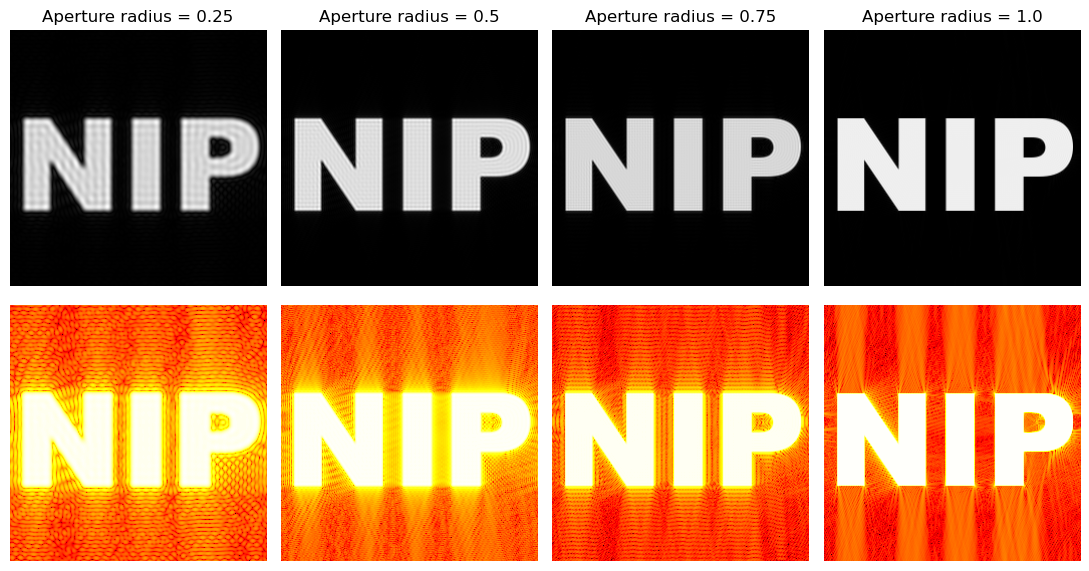

In [33]:
aperture_radius = [0.25, 0.50, 0.75, 1.00]

fig, ax = plt.subplots(2, 4, figsize = (11, 6), sharey = True, tight_layout = True)
for i, rad in enumerate(aperture_radius):
    ax[0,i].imshow(indiv_convolve(NIPtext, circular_aperture(rad, 256))[0], cmap = "gray")
    ax[0,i].set_title("Aperture radius = {}".format(rad))
    ax[0,i].axis("off")
    ax[1,i].imshow(indiv_convolve(NIPtext, circular_aperture(rad, 256))[1], cmap = "hot")
    ax[1,i].axis("off")
    
fig.savefig("nip varying aperture radius.png")

#### Other apertures

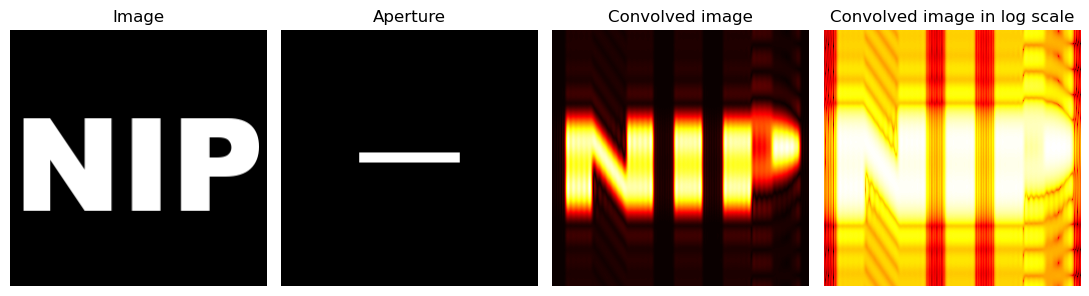

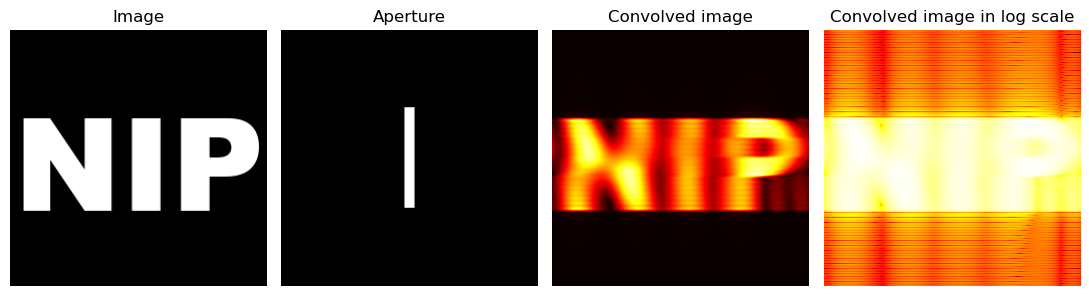

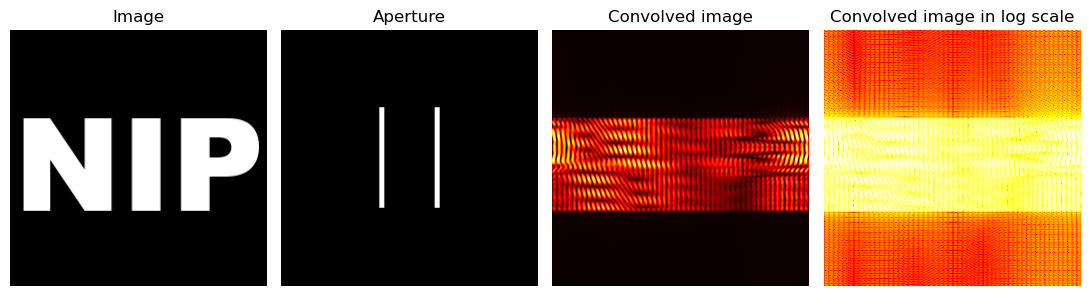

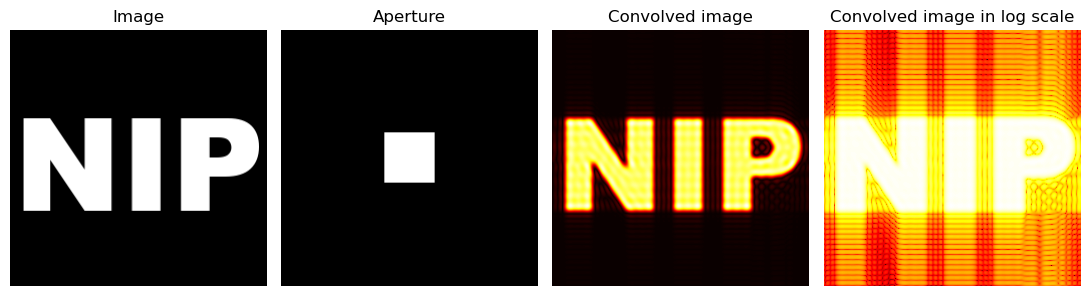

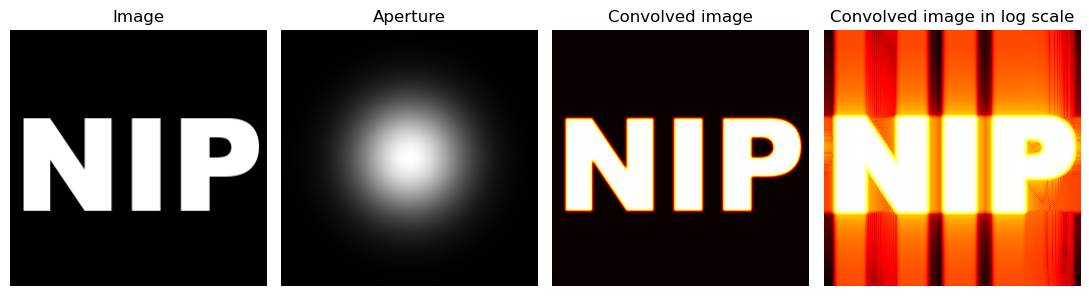

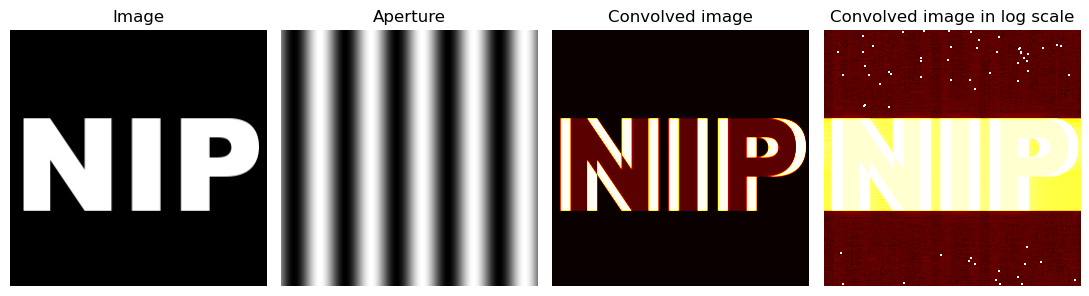

In [54]:
convolve(NIPtext, rectangular_aperture(100, 10, 256))
plt.savefig("nip rect aperture 1.png")

convolve(NIPtext, rectangular_aperture(10, 100, 256))
plt.savefig("nip rect aperture 2.png")

convolve(NIPtext, double_slit(5, 100, 50, 256))
plt.savefig("nip double slit.png")

convolve(NIPtext, rectangular_aperture(50, 50, 256))
plt.savefig("nip square aperture.png")

convolve(NIPtext, gaussian(0.3, 256))
plt.savefig("nip gaussian aperture.png")

convolve(NIPtext, sinusoid(5, np.pi, 256))
plt.savefig("nip sinusoid.png")

### James Webb telescope

Check this [site](https://www.accuweather.com/en/space-news/james-webb-space-telescope-new-image/1213566) for reference on a basis picture of star captured by the mentioned telescope.

In [36]:
def telescope_convolve(star, gray_telescopeimg):
    fftshift_telescope = fft.fftshift(gray_telescopeimg)
    fft2_star = fft.fft2(star)
    convolved_image = fftshift_telescope*fft2_star
    ifft2_image = fft.ifft2(convolved_image)
    orig_final, log_final = abs(ifft2_image), np.log(abs(ifft2_image))
    return orig_final, log_final

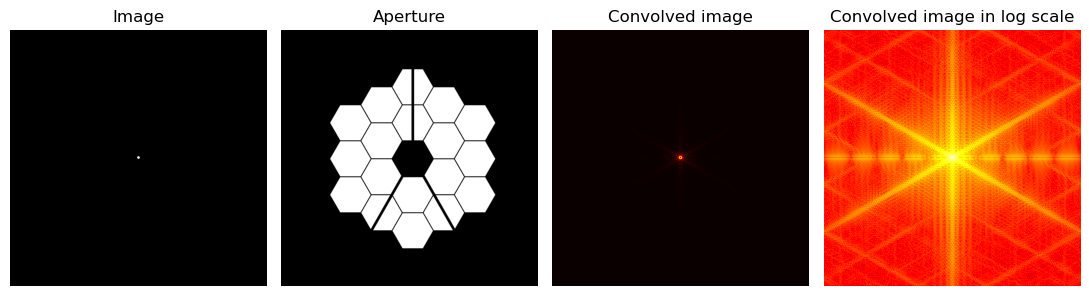

In [37]:
jwstimg = Image.open("james webb telescope - framed.png")
gray_jwstimg = np.array(jwstimg.convert("L"))
# gray_telescopeimg = telescope.resize((200, 200))
# gray_telescopeimg.save("sample.png")

star = circular_aperture(0.01, 1000)
convolve(star, gray_jwstimg)
plt.savefig("jwst convolved orig result.png")

For varying star sizes,

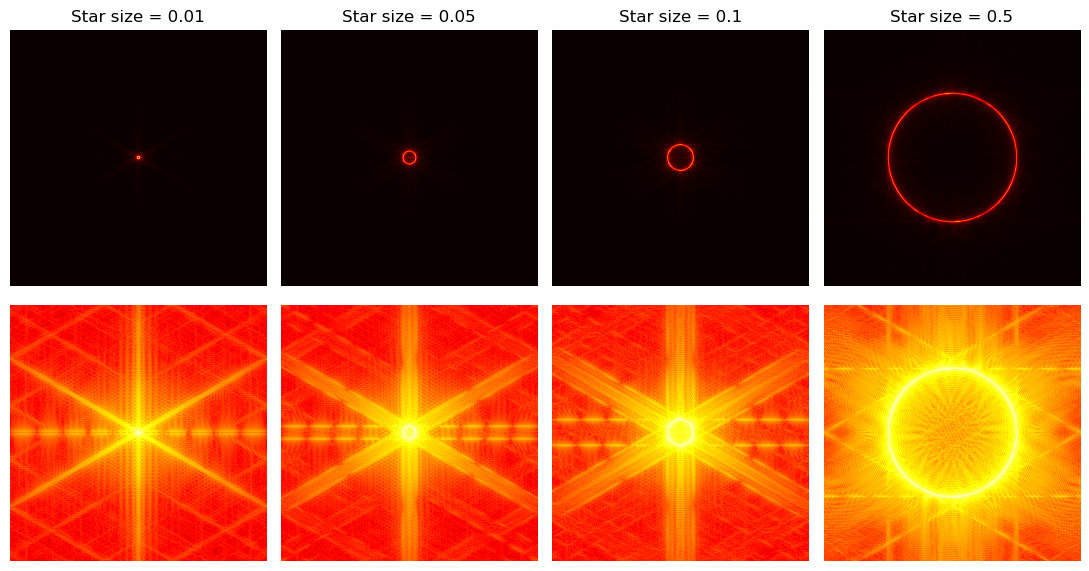

In [38]:
rad = [0.01, 0.05, 0.1, 0.5]

fig, ax = plt.subplots(2, 4, figsize = (11, 6), tight_layout = True)
for i, rad in enumerate(rad):
    ax[0,i].imshow(telescope_convolve(circular_aperture(rad, 1000), gray_jwstimg)[0], cmap = "hot")
    ax[0,i].set_title("Star size = {}".format(rad))
    ax[0,i].axis("off")
    ax[1,i].imshow(telescope_convolve(circular_aperture(rad, 1000), gray_jwstimg)[1], cmap = "hot")
    ax[1,i].axis("off")
    
fig.savefig("jwst varying star size.png")

### Hubble space telescope

A good comparison between the James Webb telescope and Hubble primary mirror is also presented in this [post](https://space.stackexchange.com/questions/58624/diffraction-artifact-on-the-march-16-2022-jwst-aligned-test-image).

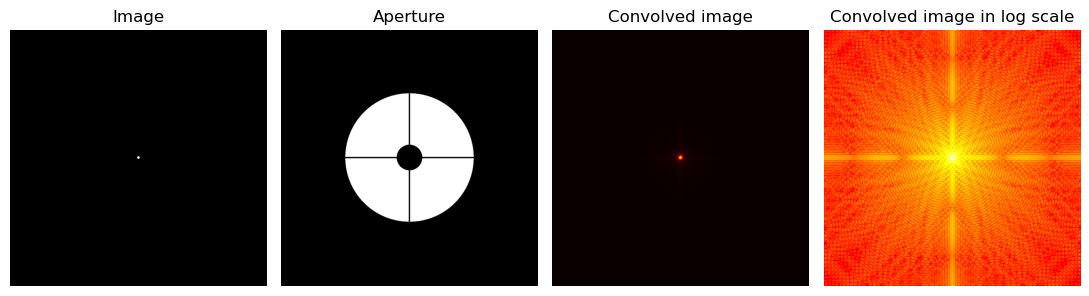

In [40]:
hubble_mirror = Image.open("hubble mirror - framed.png")
gray_hubble = np.array(hubble_mirror.convert("L"))

star = circular_aperture(0.01, 1000)
convolve(star, gray_hubble)
plt.savefig("hubble convolved orig result.png")

For varying star sizes,

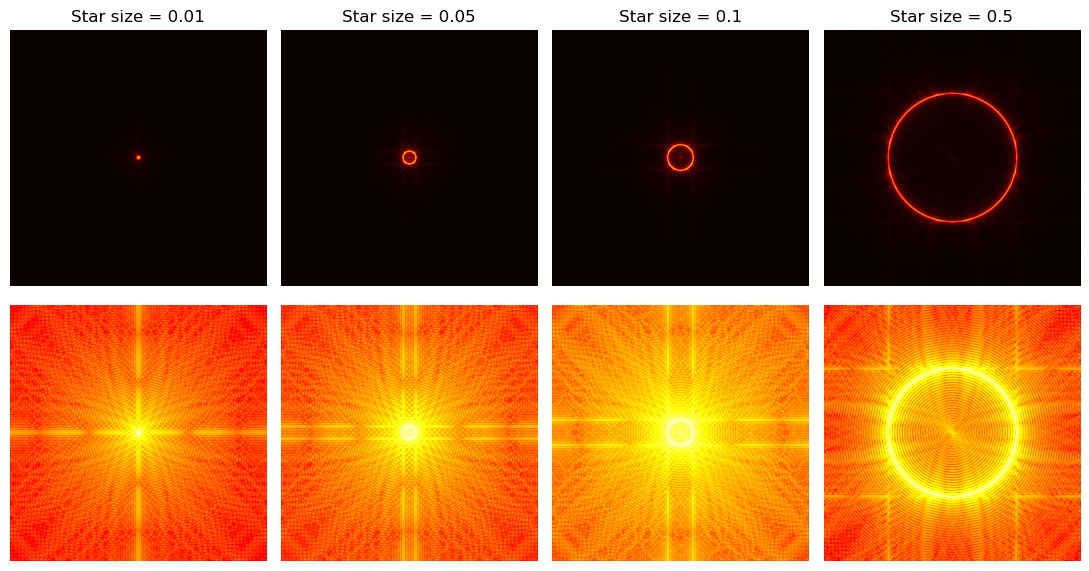

In [39]:
rad = [0.01, 0.05, 0.1, 0.5]

fig, ax = plt.subplots(2, 4, figsize = (11, 6), tight_layout = True)
for i, rad in enumerate(rad):
    ax[0,i].imshow(telescope_convolve(circular_aperture(rad, 1000), gray_hubble)[0], cmap = "hot")
    ax[0,i].set_title("Star size = {}".format(rad))
    ax[0,i].axis("off")
    ax[1,i].imshow(telescope_convolve(circular_aperture(rad, 1000), gray_hubble)[1], cmap = "hot")
    ax[1,i].axis("off")
    
fig.savefig("hubble varying star size.png")

***
## Activity 2.3 - Template matching using correlation

The correlation between two 2-D functions $f$ and $g$ is given by $$ p = f \cdot g = \iint f(x',y')g(x+x',y+y') dx' dy' $$ It is related to the convolution integral by $$ p = f(-x,-y)^* * g(x,y) $$ where the superscript asterisk at $f$ means the complex conjugate of $f$. 

Similar to the convolution, there is a correlation theorem which holds for linear transforms of $f$ and $g$: $$ P = F^*G $$ where $P$, $F$ and $G$ are the FT of $p$, $f$, and $g$, respectively. The correlation $p$ measures the degree of similarity between two functions $f$ and $g$. The more
identical they are at a certain position $(x,y)$ the higher their correlation value. Therefore, the correlation function is used often in **template matching or even pattern recognition**. An important consequence of the equation above is that if $f$ or $g$ is an even, symmetric function, the correlation is equal to the convolution.

In [27]:
def correlate(inputimg, templateimg):
    fft_correltxt = fft.fft2(inputimg)
    fft_template = fft.fft2(templateimg)
    correlated_image = (np.conjugate(fft_template))*fft_correltxt
    ifft2_image = abs(fft.ifft2(correlated_image))
    fftshift_image = fft.fftshift(ifft2_image)
    
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(inputimg, cmap = "gray")
    ax[0].set_title("Input image")
    ax[0].axis("off")
    
    ax[1].imshow(templateimg, cmap = "gray")
    ax[1].set_title("Template image")
    ax[1].axis("off")
    
    ax[2].imshow(fftshift_image, cmap = "turbo")
    ax[2].set_title("Correlation map")
    ax[2].axis("off")

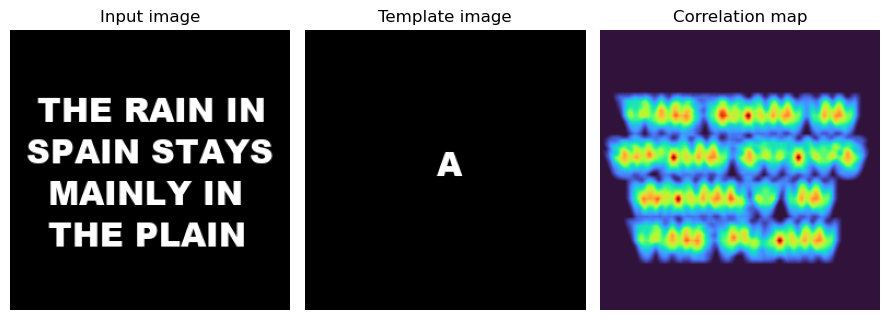

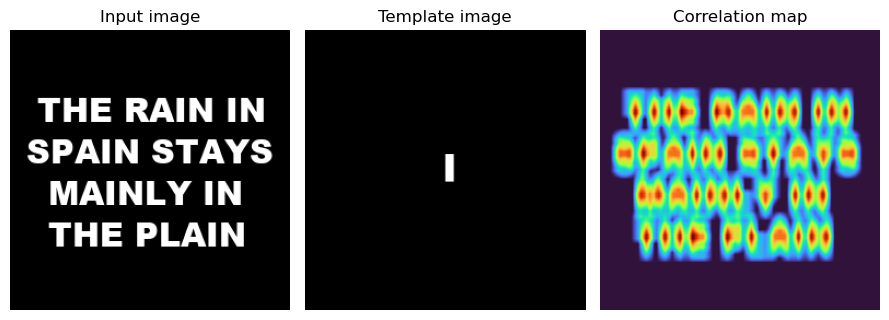

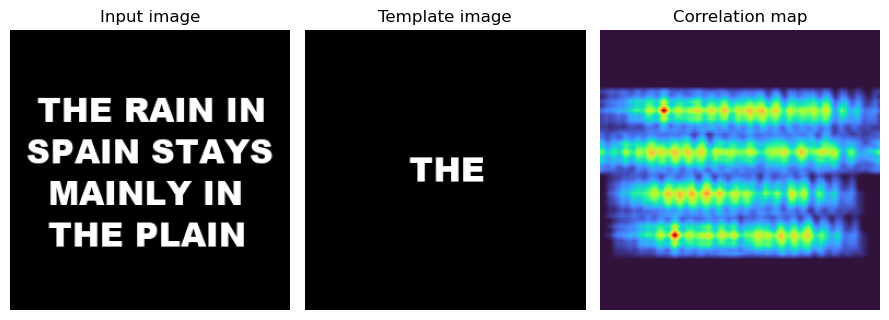

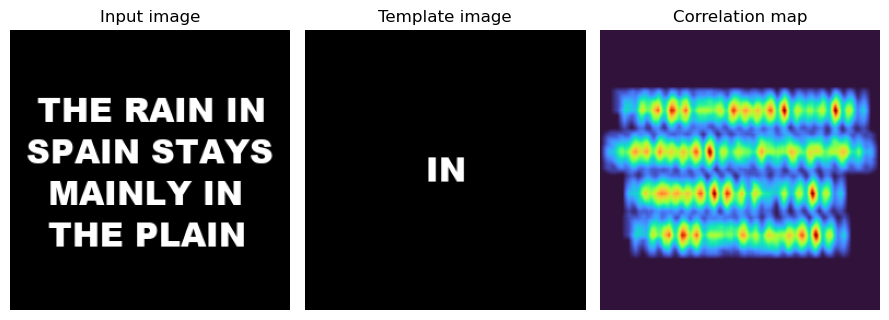

In [41]:
correlationtxt = textimg_generate(15, 50, 30, text = " THE RAIN IN\nSPAIN STAYS \n  MAINLY IN \n  THE PLAIN")
letterA = textimg_generate(120, 100, 30, text = "A")
letterI = textimg_generate(125, 100, 35, text = "I")
THEtext = textimg_generate(95, 105, 30, text = "THE")
INtext = textimg_generate(110, 105, 30, text = "IN")

correlate(correlationtxt, letterA)
plt.savefig("letter a correlate.png")

correlate(correlationtxt, letterI)
plt.savefig("letter i correlate.png")

correlate(correlationtxt, THEtext)
plt.savefig("phrase the correlate.png")

correlate(correlationtxt, INtext)
plt.savefig("phrase in correlate.png")

Trying more samples for fun!

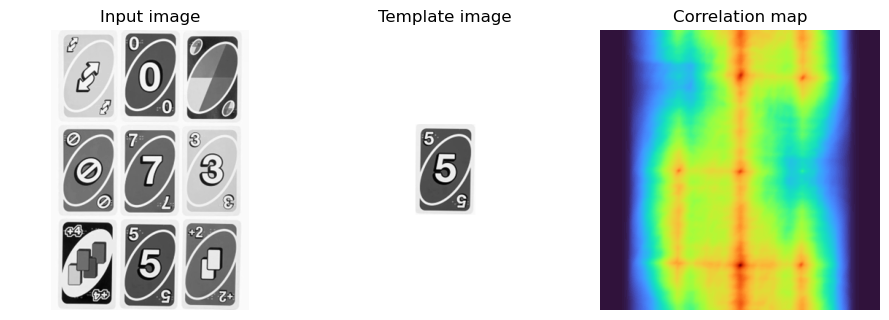

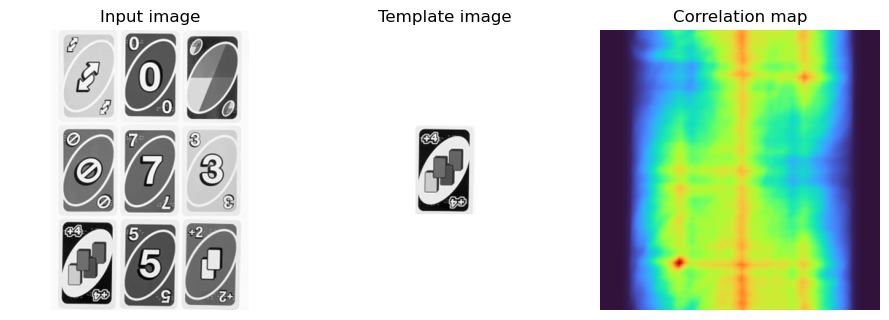

In [42]:
cardimg = Image.open("uno cards.png")
cardimg = np.array(cardimg.convert("L")) 

# threecardimg = Image.open("3 card.png")
# threecardimg = np.array(threecardimg.convert("L"))

fivecardimg = Image.open("card 5.png")
fivecardimg = np.array(fivecardimg.convert("L"))

pluscardimg = Image.open("plus 4 card.png")
pluscardimg = np.array(pluscardimg.convert("L"))

correlate(cardimg, fivecardimg)
plt.savefig("card 5 correlate.png")

correlate(cardimg, pluscardimg)
plt.savefig("card plus 4 correlate.png")